In [1]:
#import some libraries that we'll use
from collections import Counter
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.lines import Line2D
from imblearn.datasets import make_imbalance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import geometric_mean_score

In [2]:
#method to generate dataset
def create_dataset(n_samples=5000, weights = (0.5,0.5), n_classes=2,
                   class_sep=0.01, n_clusters = 2):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes, 
                               flip_y = 0.1,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

In [3]:
#method to plot the decision function
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [4]:
from sklearn.model_selection import train_test_split

#X for feature, y for label
X, y = create_dataset (n_samples=5000, weights = (0.8, 0.2), class_sep=0.5)

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state=42)
print (X_train.shape)
print (y_test.shape)

print ("Komponen training set = {}" .format(Counter(y_train)))
print ("Komponen testing set = {}" .format(Counter(y_test)))


#define the classifier and fit the training set
clf_logreg = LogisticRegression(C=0.1, penalty='l2', solver='sag')
clf_logreg.fit(X_train, y_train)

clf_knn = KNeighborsClassifier(n_neighbors=3, algorithm="auto", metric="euclidean")
clf_knn.fit(X_train, y_train)

clf_svm = SVC(gamma=2, C=1)
clf_svm.fit(X_train, y_train)

clf_dt = DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf_dt.fit(X_train, y_train)

clf_rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto')
clf_rf.fit(X_train, y_train)


(4000, 2)
(1000,)
Komponen training set = Counter({0: 3073, 1: 927})
Komponen testing set = Counter({0: 767, 1: 233})


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


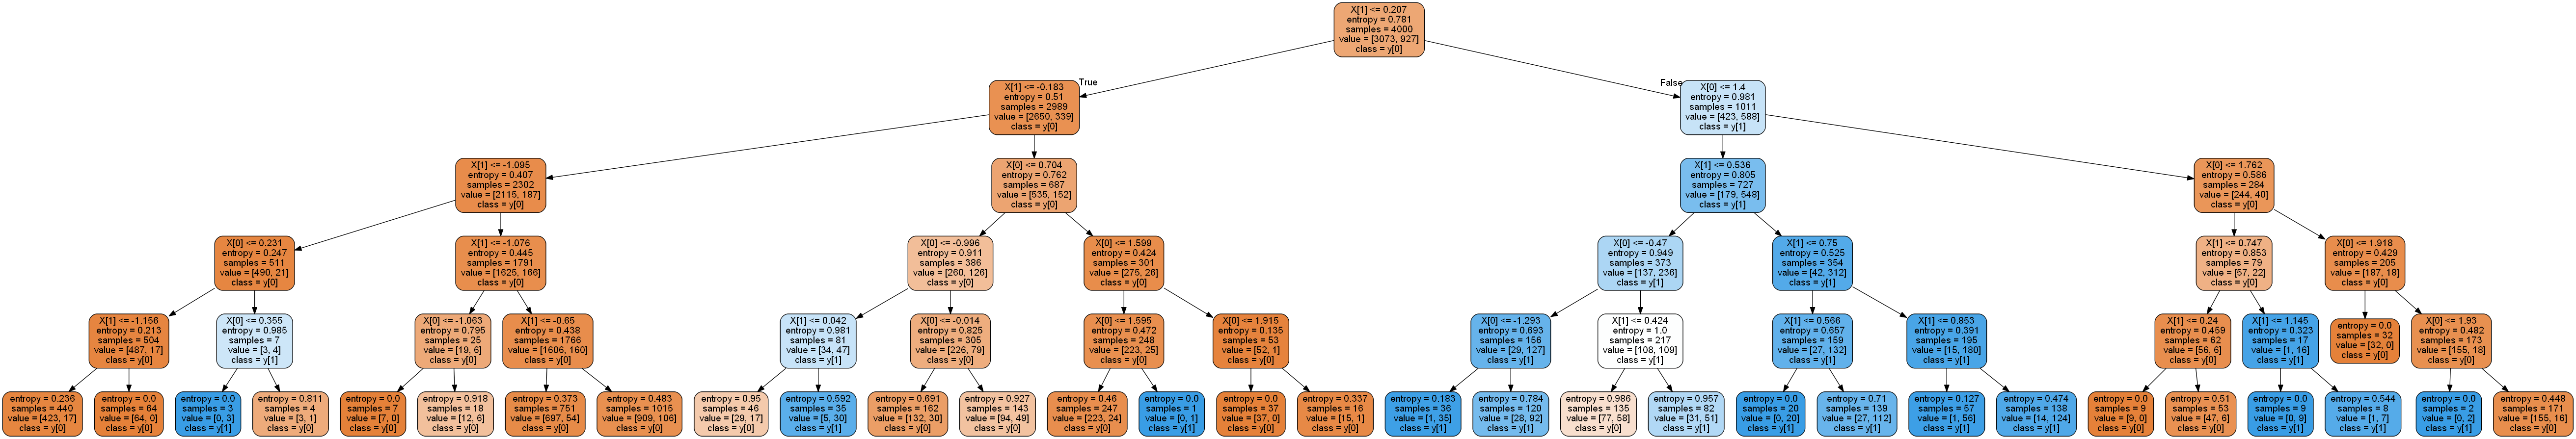

In [5]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz (clf_dt, out_file='create_dataset_with_noise.dot',
                  class_names=True,
                rounded=True, proportion=False, precision=3, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(filename = 'create_dataset_with_noise.png')

In [6]:
print ("Pengukuran Performa Training Set : \n")
names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]
# clf = (clf_logreg,clf_knn, clf_svm, clf_dt,clf_rf)
for classifiers, name in zip ((clf_logreg, clf_knn, clf_svm, clf_dt, clf_rf), names):
# for classifiers, name in zip ((clf_logreg, clf_knn, clf_svm, clf_dt, clf_rf), names):
    print ("\nHasil klasifikasi testing set {}: " .format(name))
    y_pred = classifiers.predict(X_train)

    print(classification_report(y_train, y_pred))
    
    G_mean = geometric_mean_score (y_train, y_pred)
    print ("G-Mean untuk {} : "  .format(name) , G_mean)

Pengukuran Performa Training Set : 


Hasil klasifikasi testing set Logistic Regression: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3073
           1       0.78      0.57      0.66       927

   micro avg       0.86      0.86      0.86      4000
   macro avg       0.83      0.76      0.79      4000
weighted avg       0.86      0.86      0.86      4000

G-Mean untuk Logistic Regression :  0.7352876322412827

Hasil klasifikasi testing set K-Nearest Neighbours: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3073
           1       0.86      0.69      0.76       927

   micro avg       0.90      0.90      0.90      4000
   macro avg       0.89      0.83      0.85      4000
weighted avg       0.90      0.90      0.90      4000

G-Mean untuk K-Nearest Neighbours :  0.8155815953816768

Hasil klasifikasi testing set Support Vector Machine: 
              precision    recall  

In [7]:
print ("Pengukuran Performa Testing Set : \n")
names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]
# clf = (clf_logreg,clf_knn, clf_svm, clf_dt,clf_rf)
for classifiers, name in zip ((clf_logreg, clf_knn, clf_svm, clf_dt, clf_rf), names):
    print ("\nHasil klasifikasi testing set {}: " .format(name))
    y_pred = classifiers.predict(X_test)

    print(classification_report(y_test, y_pred))
    
    G_mean = geometric_mean_score (y_test, y_pred)
    print ("G-Mean untuk {} : "  .format(name) , G_mean)

Pengukuran Performa Testing Set : 


Hasil klasifikasi testing set Logistic Regression: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       767
           1       0.85      0.63      0.73       233

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.88      0.80      0.83      1000
weighted avg       0.89      0.89      0.88      1000

G-Mean untuk Logistic Regression :  0.7812409105513961

Hasil klasifikasi testing set K-Nearest Neighbours: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       767
           1       0.74      0.64      0.69       233

   micro avg       0.86      0.86      0.86      1000
   macro avg       0.82      0.79      0.80      1000
weighted avg       0.86      0.86      0.86      1000

G-Mean untuk K-Nearest Neighbours :  0.7720945957208858

Hasil klasifikasi testing set Support Vector Machine: 
              precision    recall  f

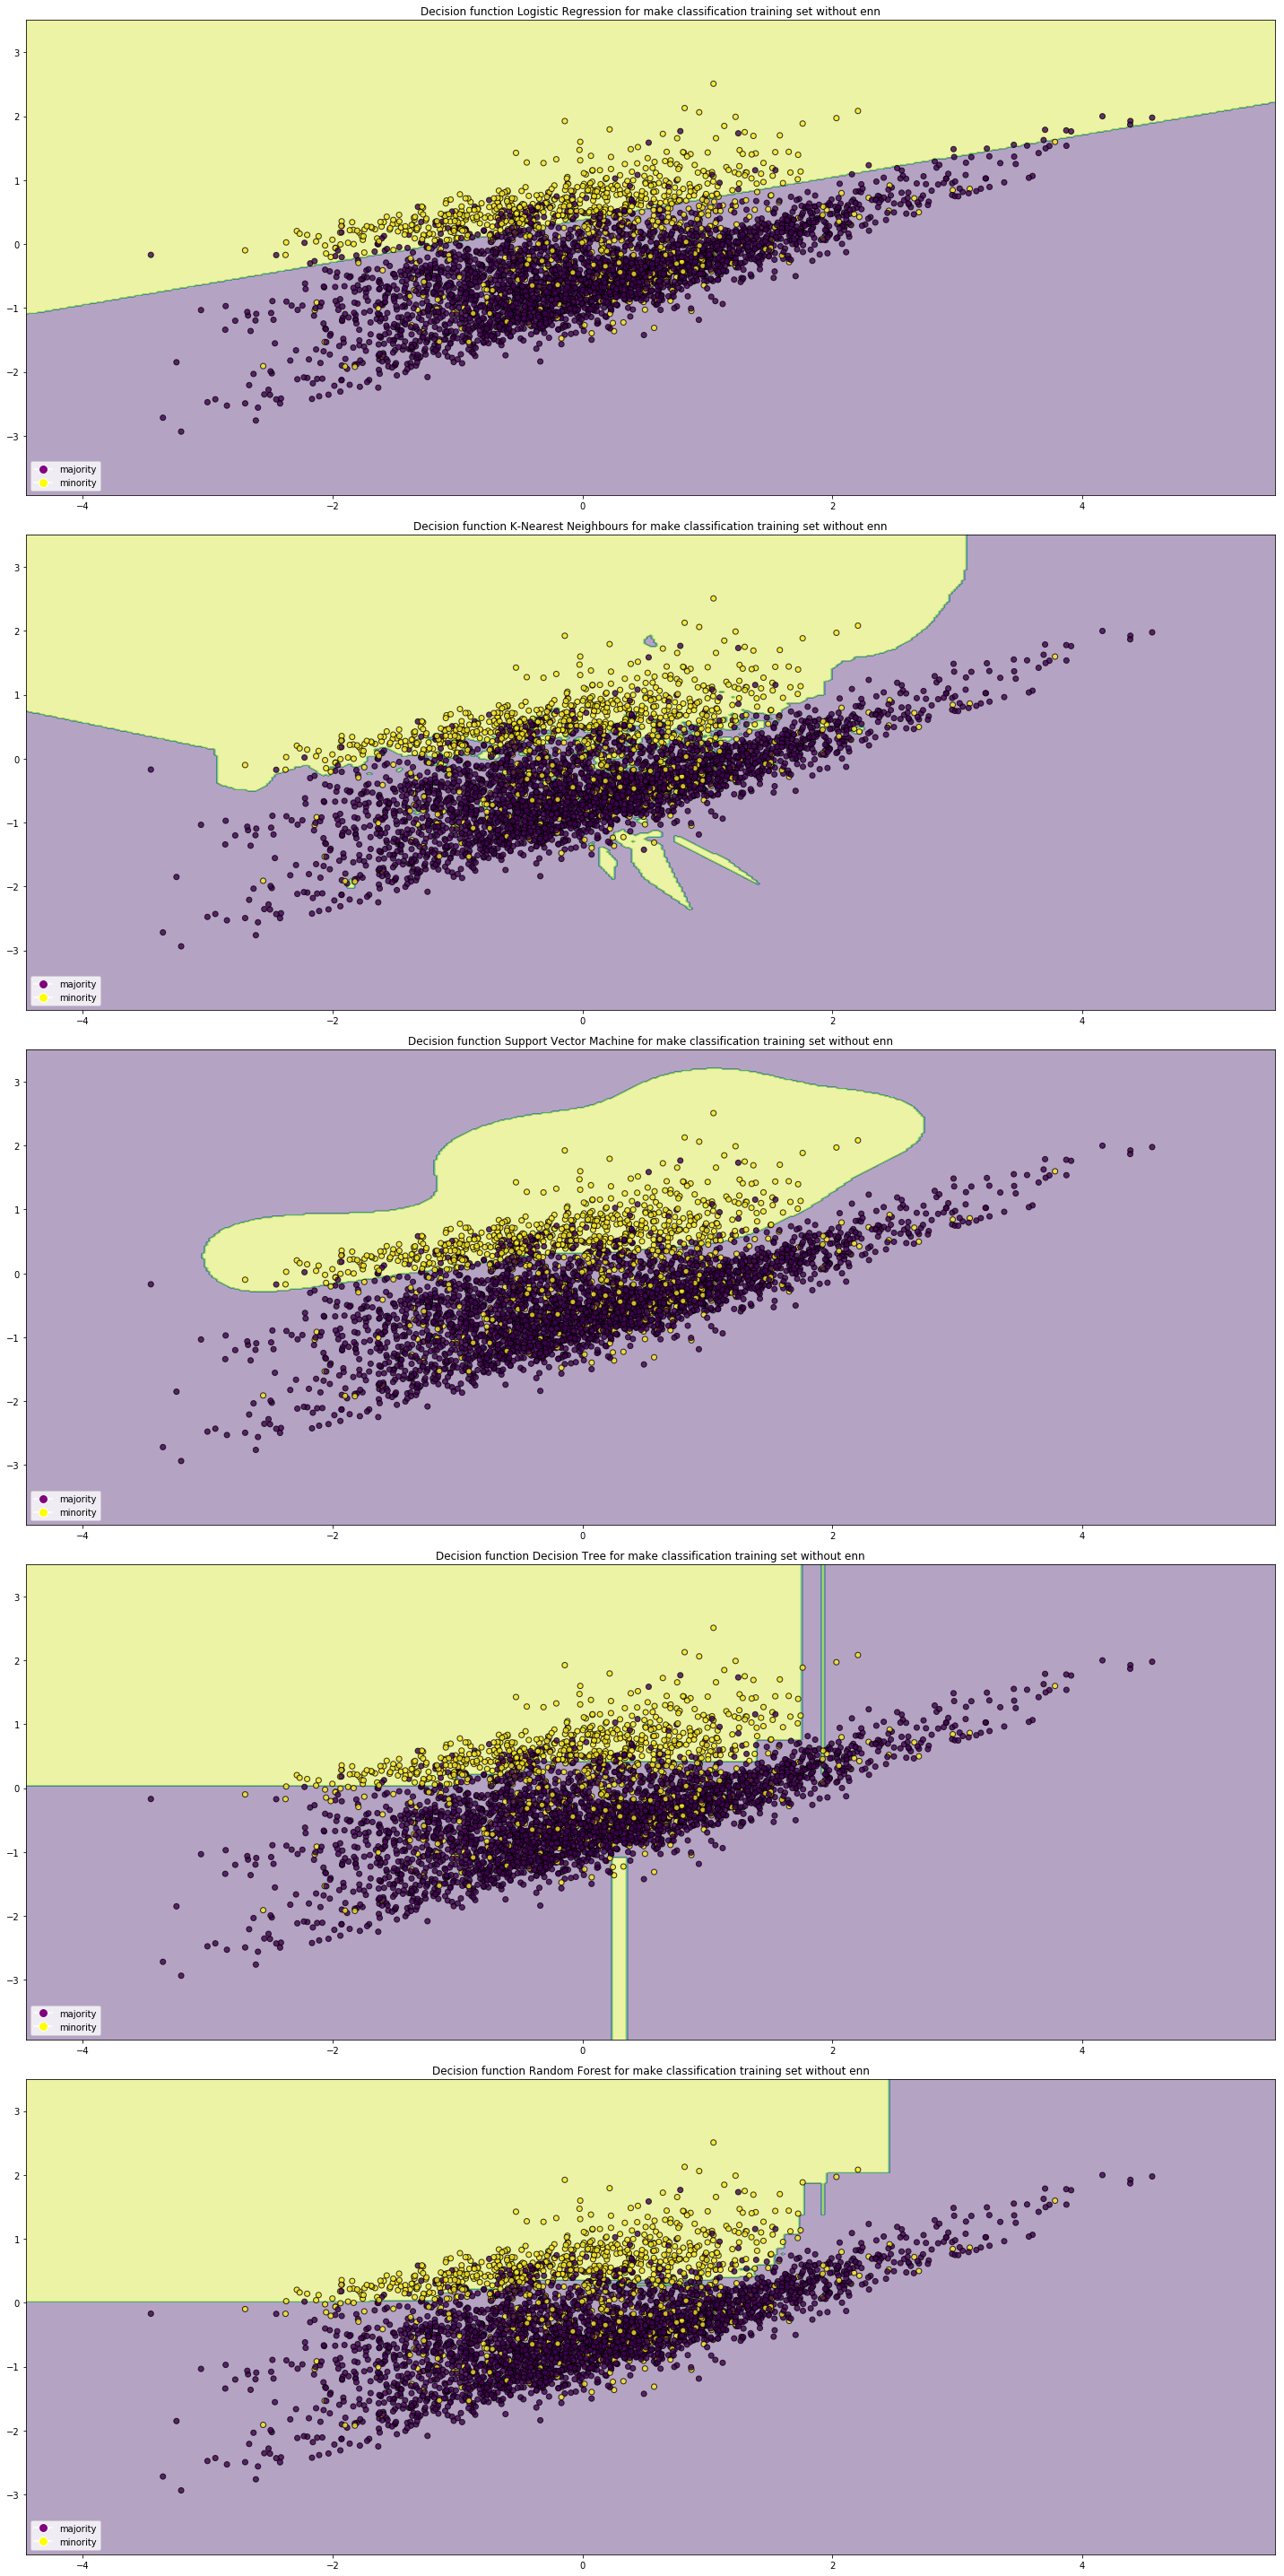

In [8]:
fig, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(5, figsize = (20,40))

# classifiers = [clf_logreg, clf_knn]
ax_arr = ((ax1), (ax2), (ax3), (ax4), (ax5))
names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]

for ax, name, classifier in zip (ax_arr, names,  (clf_logreg, clf_knn, clf_svm, clf_dt, clf_rf)):
    classifier.fit(X_train,y_train)
    
    plot_decision_function(X_train, y_train, classifier, ax)
    ax.set_title('Decision function {} for make classification training set without enn'.format(name))
    majority=Line2D([], [], color="w", markerfacecolor='purple', marker='o', label='majority', markersize=10)
    minority=Line2D([], [], color="w", markerfacecolor='yellow', marker='o', label='minority', markersize=10)
    ax.legend(handles=[majority,minority], loc='lower left', frameon=True)
fig.tight_layout()
plt.savefig("decision function make classification training set without enn.pdf")


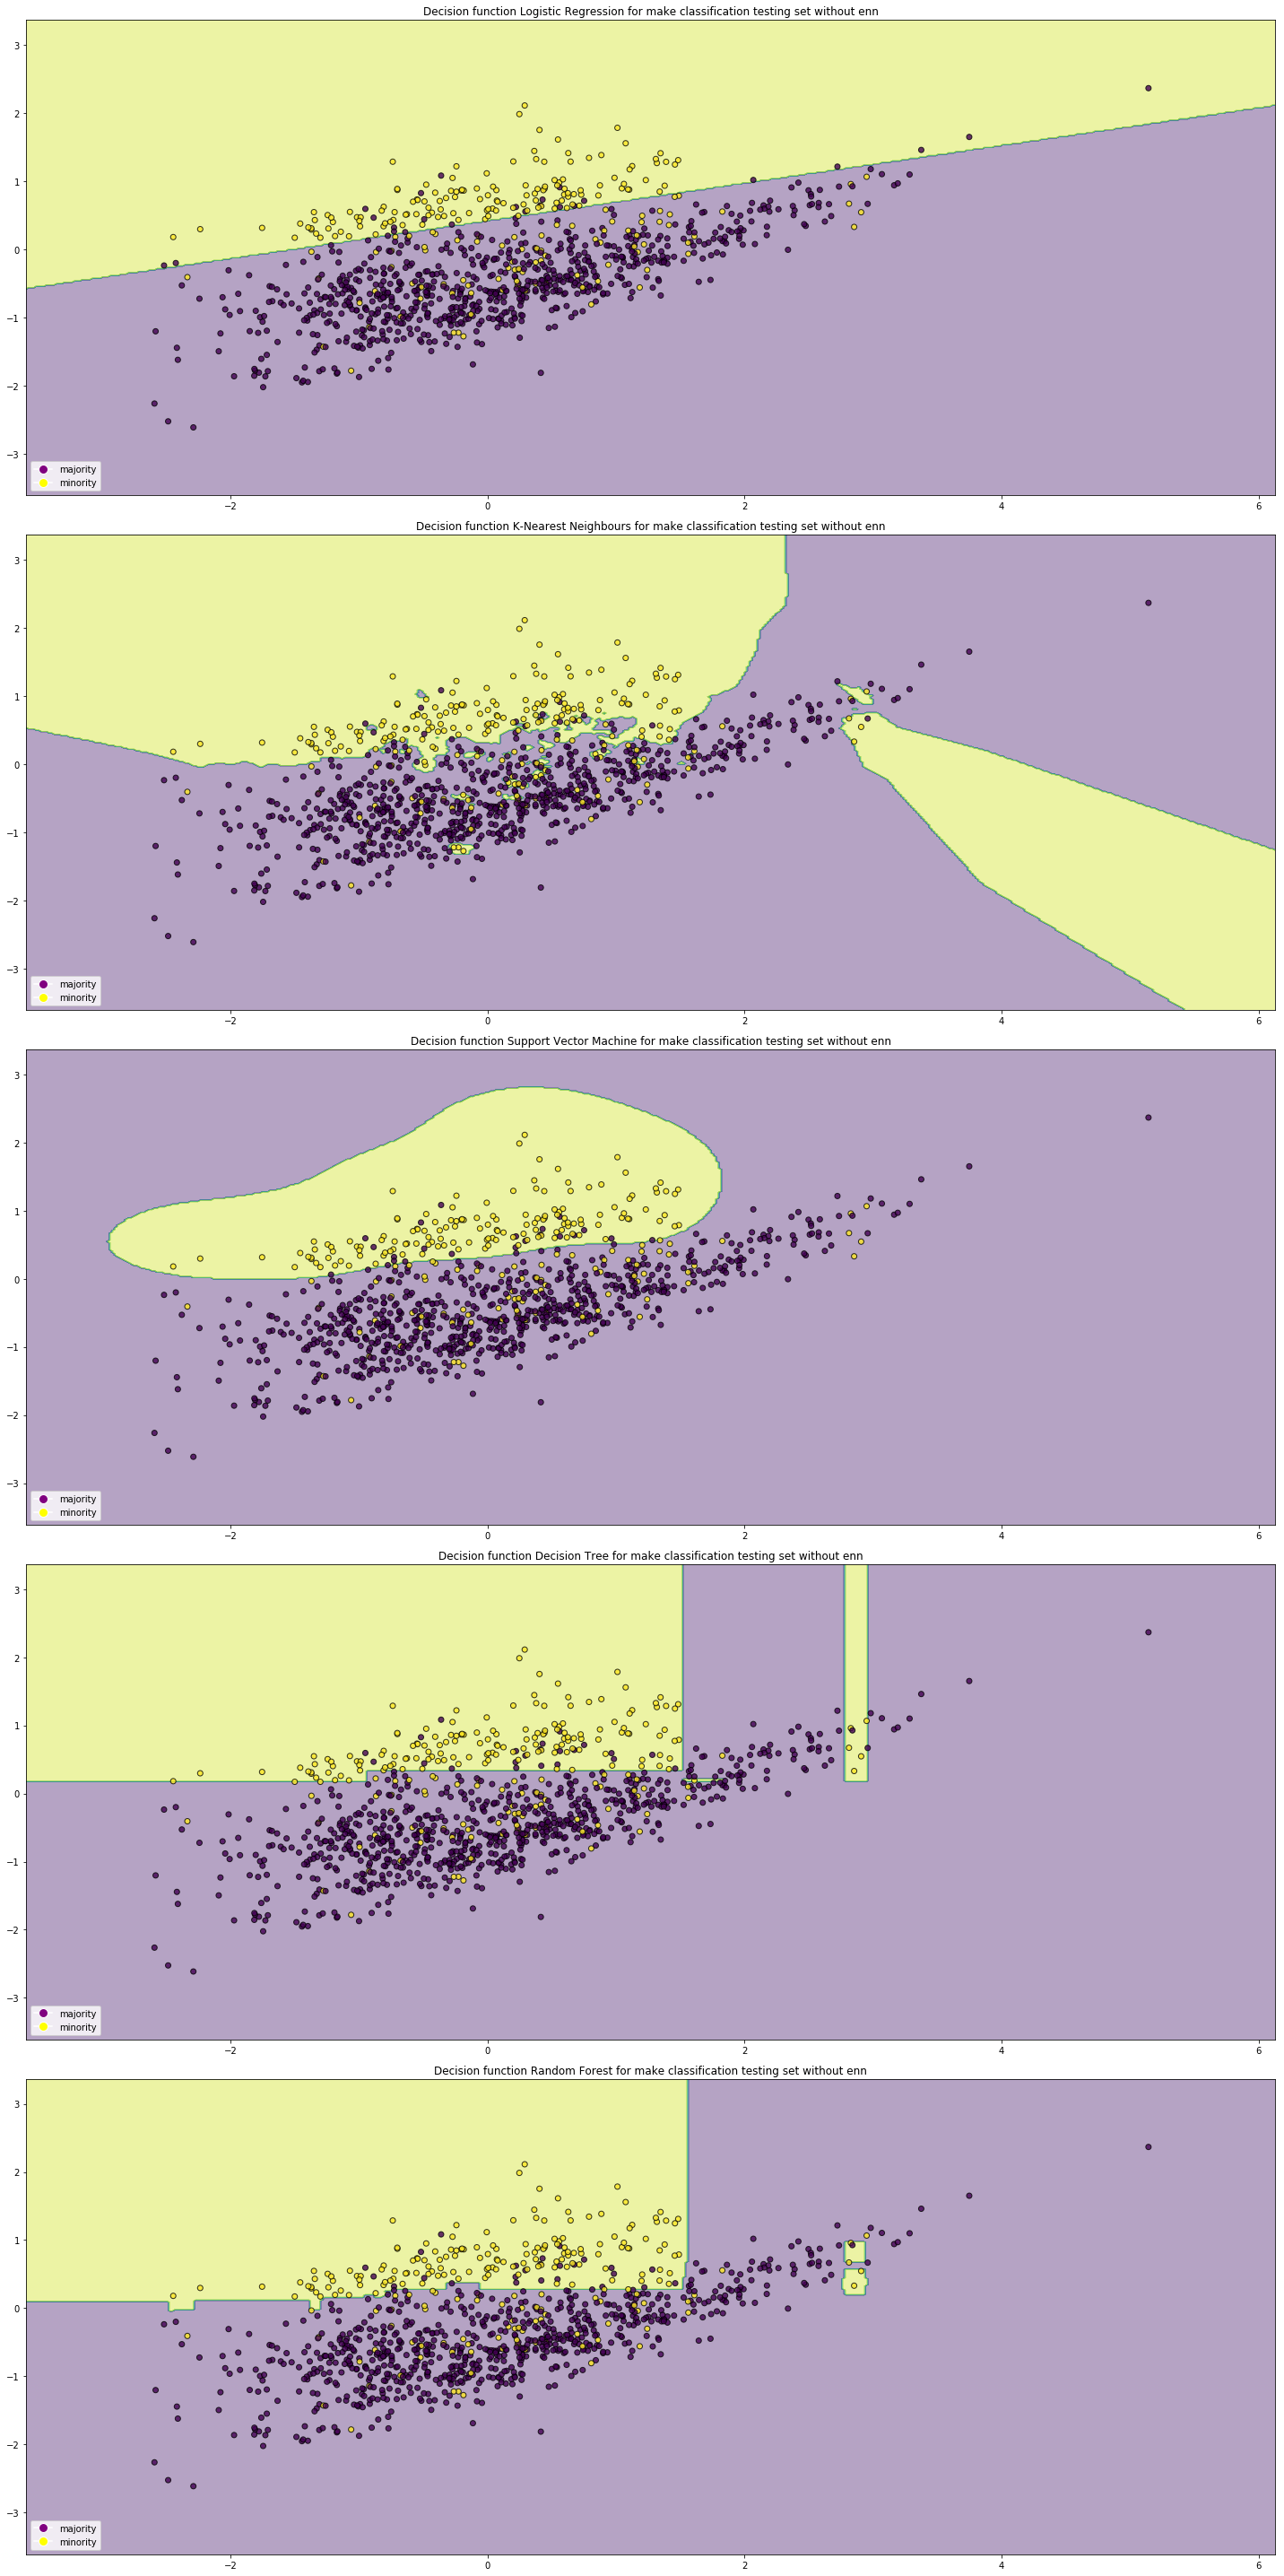

In [9]:
fig, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(5, figsize = (20,40))

# classifiers = [clf_logreg, clf_knn]
ax_arr = ((ax1), (ax2), (ax3), (ax4), (ax5))
names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]

for ax, name, classifier in zip (ax_arr, names,  (clf_logreg, clf_knn, clf_svm, clf_dt, clf_rf)):
    classifier.fit(X_test,y_test)
    
    plot_decision_function(X_test, y_test, classifier, ax)
    ax.set_title('Decision function {} for make classification testing set without enn'.format(name))
    majority=Line2D([], [], color="w", markerfacecolor='purple', marker='o', label='majority', markersize=10)
    minority=Line2D([], [], color="w", markerfacecolor='yellow', marker='o', label='minority', markersize=10)
    ax.legend(handles=[majority,minority], loc='lower left', frameon=True)
fig.tight_layout()
plt.savefig("decision function make classification testing set without enn.pdf")


In [10]:
from sklearn.datasets import make_moons

X3, y3 = make_moons (n_samples=3200, shuffle=True, noise =0.3)
X_imb3, y_imb3 = make_imbalance(X3, y3, sampling_strategy={0:1600, 1:400})
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_imb3, y_imb3, test_size = 0.2, random_state=42)

print ("Original Dataset = {}" .format(Counter(y3)))
print ("Komponen dataset setelah dibuat imbalance = {}" .format(Counter(y_imb3)))
print ("Komponen training set = {}" .format(Counter(y_train3)))
print ("Komponen testing set = {}" .format(Counter(y_test3)))
#Train dataset dengan classifier
clf_logreg3 = LogisticRegression(C=0.1, penalty='l2', solver='sag')
clf_logreg3.fit(X_train3,y_train3)

clf_knn3 = KNeighborsClassifier(n_neighbors=3, algorithm='auto', metric='euclidean')
clf_knn3.fit(X_train3, y_train3)

clf_svm3 = SVC(gamma=2, C=1)
clf_svm3.fit(X_train3, y_train3)

clf_dt3 = DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf_dt3.fit(X_train3, y_train3)

clf_rf3 = RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto')
clf_rf3.fit(X_train3, y_train3)


Original Dataset = Counter({0: 1600, 1: 1600})
Komponen dataset setelah dibuat imbalance = Counter({0: 1600, 1: 400})
Komponen training set = Counter({0: 1290, 1: 310})
Komponen testing set = Counter({0: 310, 1: 90})


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


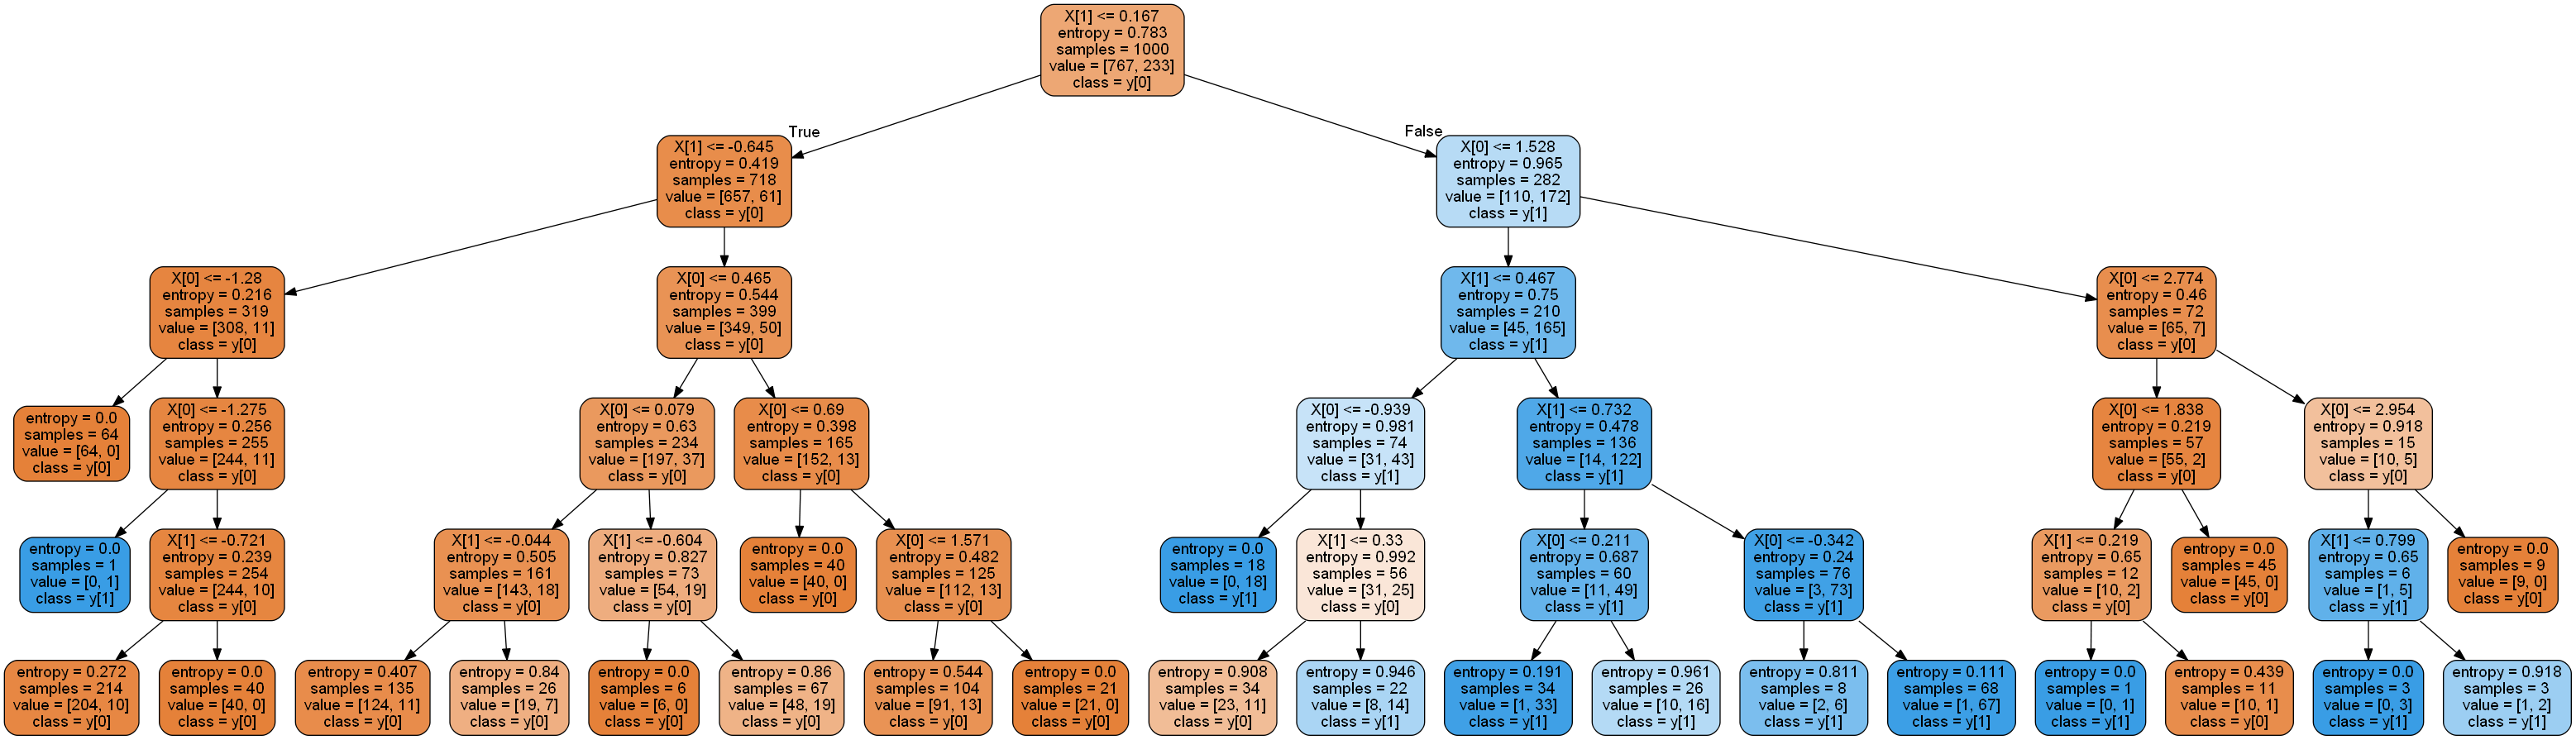

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz (clf_dt, out_file='moon_dataset.dot',
                  class_names=True,
                rounded=True, proportion=False, precision=3, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(filename = 'moon_dataset.png')

In [12]:
print ("Pengukuran Performa Training Set : \n")
names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]
# clf = (clf_logreg,clf_knn, clf_svm, clf_dt,clf_rf)
for classifiers, name in zip ((clf_logreg3, clf_knn3, clf_svm3, clf_dt3, clf_rf3), names):
# for classifiers, name in zip ((clf_logreg, clf_knn, clf_svm, clf_dt, clf_rf), names):
    print ("\nHasil klasifikasi training set {}: " .format(name))
    y_pred = classifiers.predict(X_train3)

    print(classification_report(y_train3, y_pred))
    
    G_mean = geometric_mean_score (y_train3, y_pred)
    print ("G-Mean untuk {} : "  .format(name) , G_mean)

Pengukuran Performa Training Set : 


Hasil klasifikasi training set Logistic Regression: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1290
           1       0.83      0.62      0.71       310

   micro avg       0.90      0.90      0.90      1600
   macro avg       0.87      0.79      0.82      1600
weighted avg       0.90      0.90      0.90      1600

G-Mean untuk Logistic Regression :  0.774693511983531

Hasil klasifikasi training set K-Nearest Neighbours: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1290
           1       0.91      0.82      0.86       310

   micro avg       0.95      0.95      0.95      1600
   macro avg       0.94      0.90      0.92      1600
weighted avg       0.95      0.95      0.95      1600

G-Mean untuk K-Nearest Neighbours :  0.8967223805375548

Hasil klasifikasi training set Support Vector Machine: 
              precision    recall

In [13]:
print ("Pengukuran Performa Testing Set : \n")
names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]
# clf = (clf_logreg,clf_knn, clf_svm, clf_dt,clf_rf)
for classifiers, name in zip ((clf_logreg3, clf_knn3, clf_svm3, clf_dt3, clf_rf3), names):
    print ("\nHasil klasifikasi testing set {}: " .format(name))
    y_pred = classifiers.predict(X_test3)

    print(classification_report(y_test3, y_pred))
    
    G_mean = geometric_mean_score (y_test3, y_pred)
    print ("G-Mean untuk {} : "  .format(name) , G_mean)

Pengukuran Performa Testing Set : 


Hasil klasifikasi testing set Logistic Regression: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       310
           1       0.88      0.59      0.71        90

   micro avg       0.89      0.89      0.89       400
   macro avg       0.89      0.78      0.82       400
weighted avg       0.89      0.89      0.88       400

G-Mean untuk Logistic Regression :  0.758677400381389

Hasil klasifikasi testing set K-Nearest Neighbours: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       310
           1       0.87      0.68      0.76        90

   micro avg       0.91      0.91      0.91       400
   macro avg       0.89      0.82      0.85       400
weighted avg       0.90      0.91      0.90       400

G-Mean untuk K-Nearest Neighbours :  0.8112338494065315

Hasil klasifikasi testing set Support Vector Machine: 
              precision    recall  f1

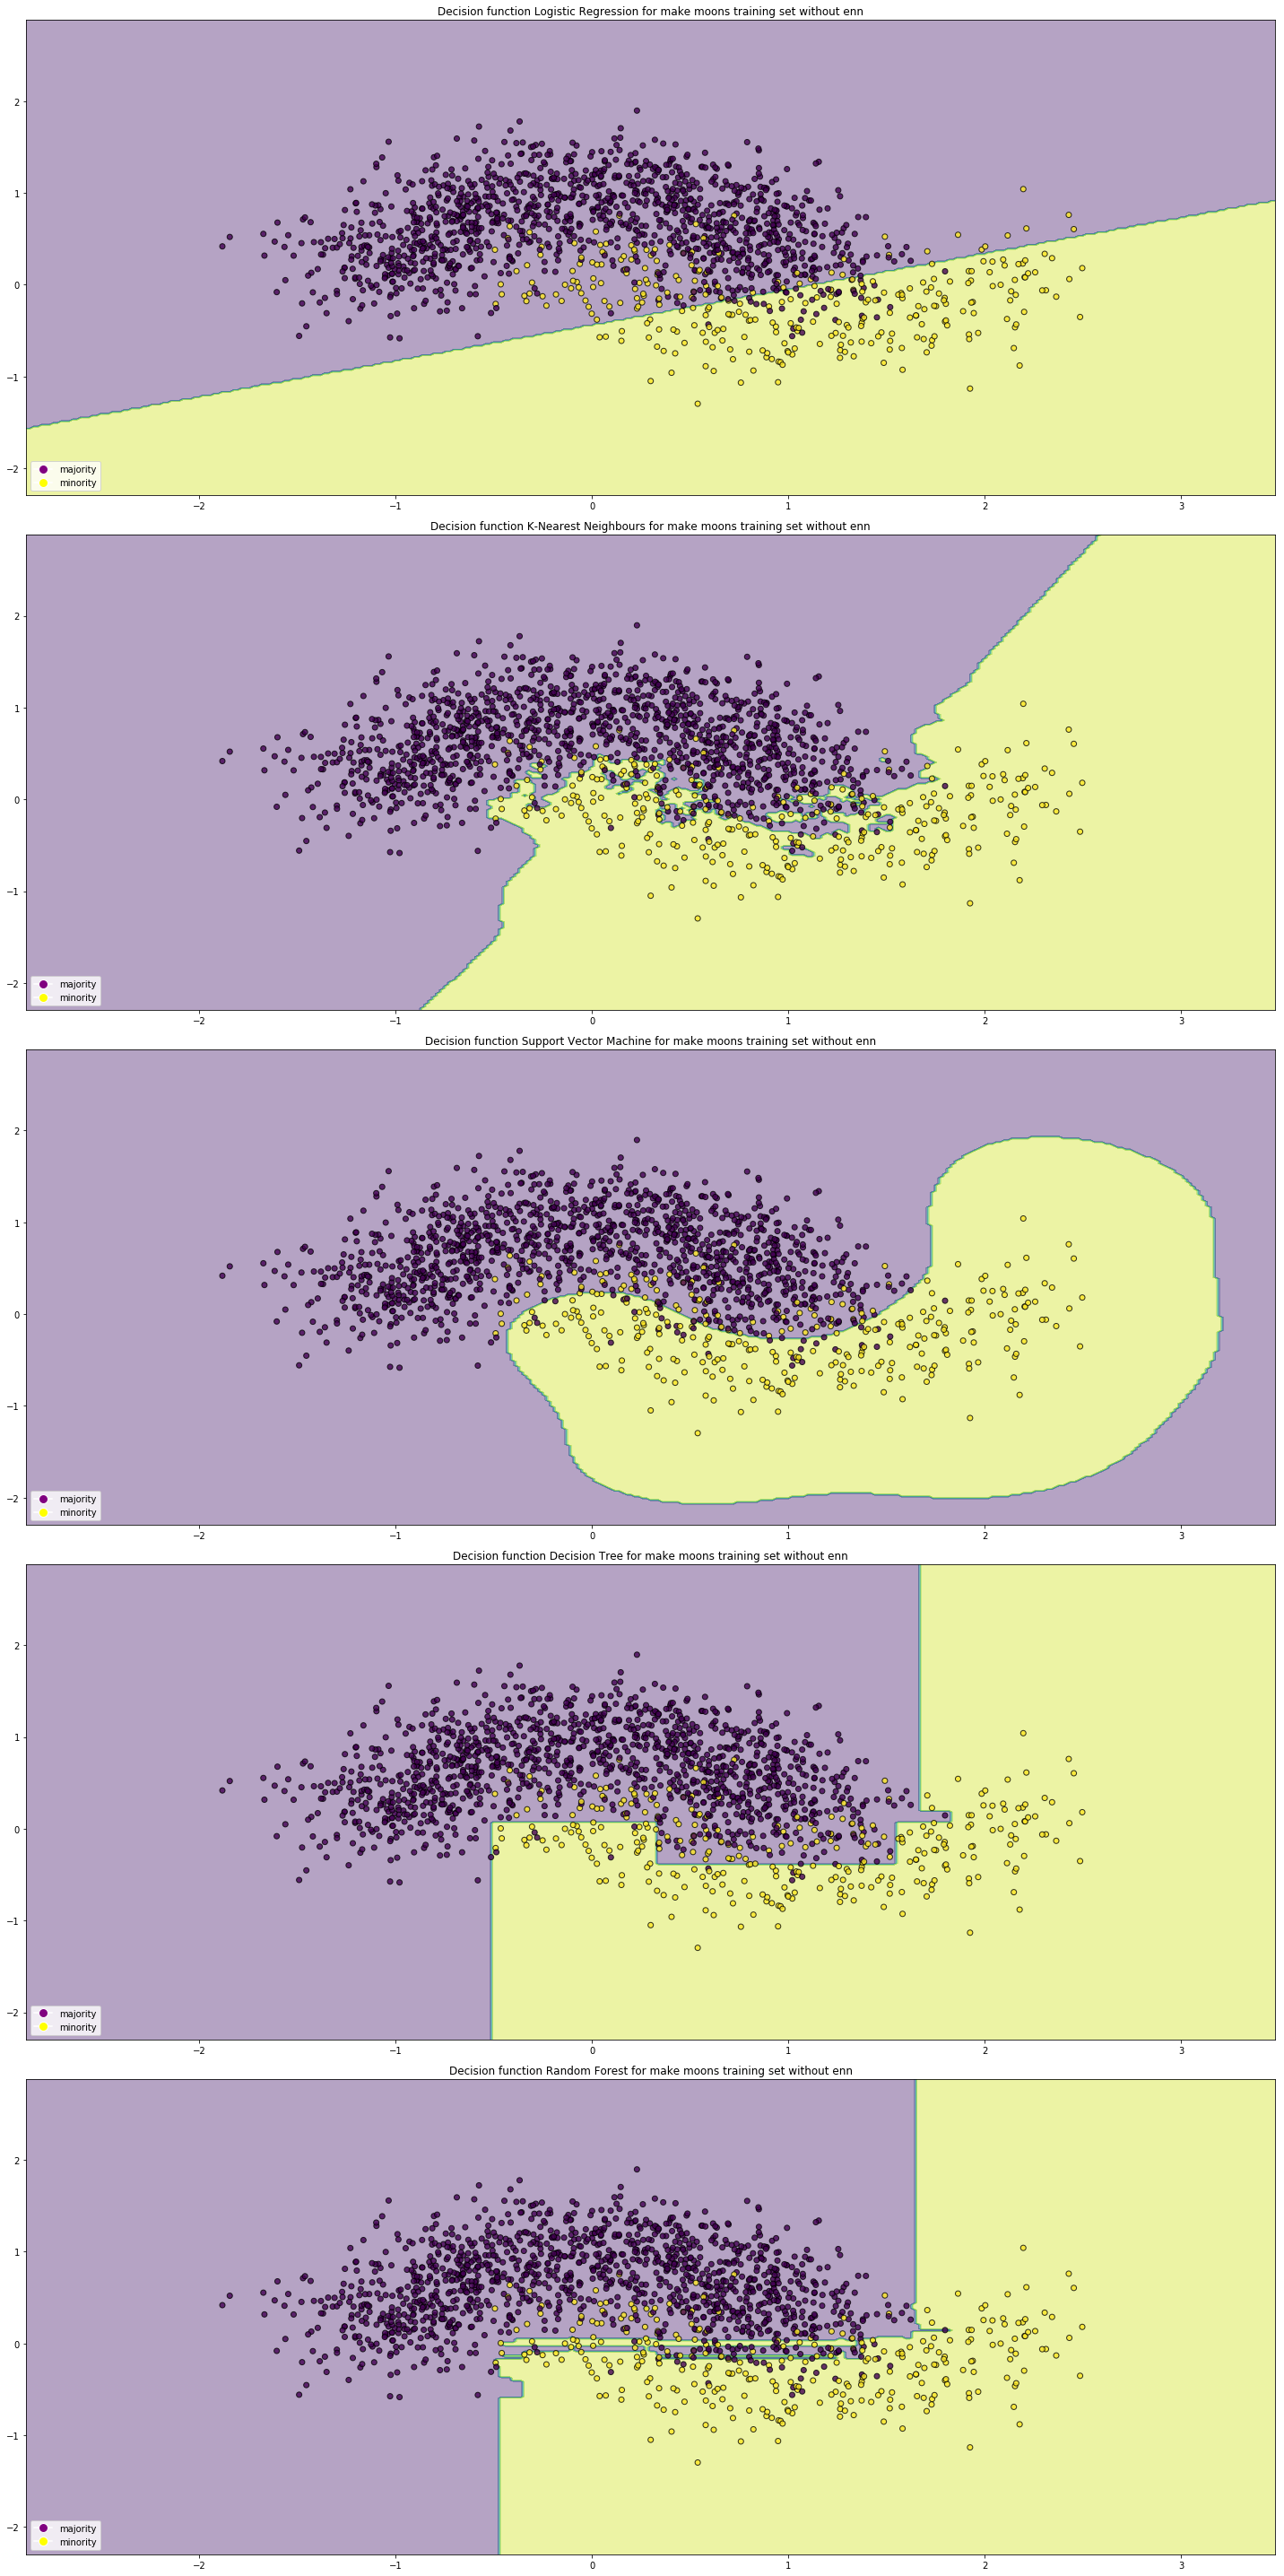

In [14]:
fig, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(5, figsize = (20,40))

# classifiers = [clf_logreg, clf_knn]
ax_arr = ((ax1), (ax2), (ax3), (ax4), (ax5))
names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]

for ax, name, classifier in zip (ax_arr, names,  (clf_logreg3, clf_knn3, clf_svm3, clf_dt3, clf_rf3)):
    classifier.fit(X_train3,y_train3)
    
    plot_decision_function(X_train3, y_train3, classifier, ax)
    ax.set_title('Decision function {} for make moons training set without enn'.format(name))
    majority=Line2D([], [], color="w", markerfacecolor='purple', marker='o', label='majority', markersize=10)
    minority=Line2D([], [], color="w", markerfacecolor='yellow', marker='o', label='minority', markersize=10)
    ax.legend(handles=[majority,minority], loc='lower left', frameon=True)
fig.tight_layout()
plt.savefig("decision function make moons training set without enn.pdf")


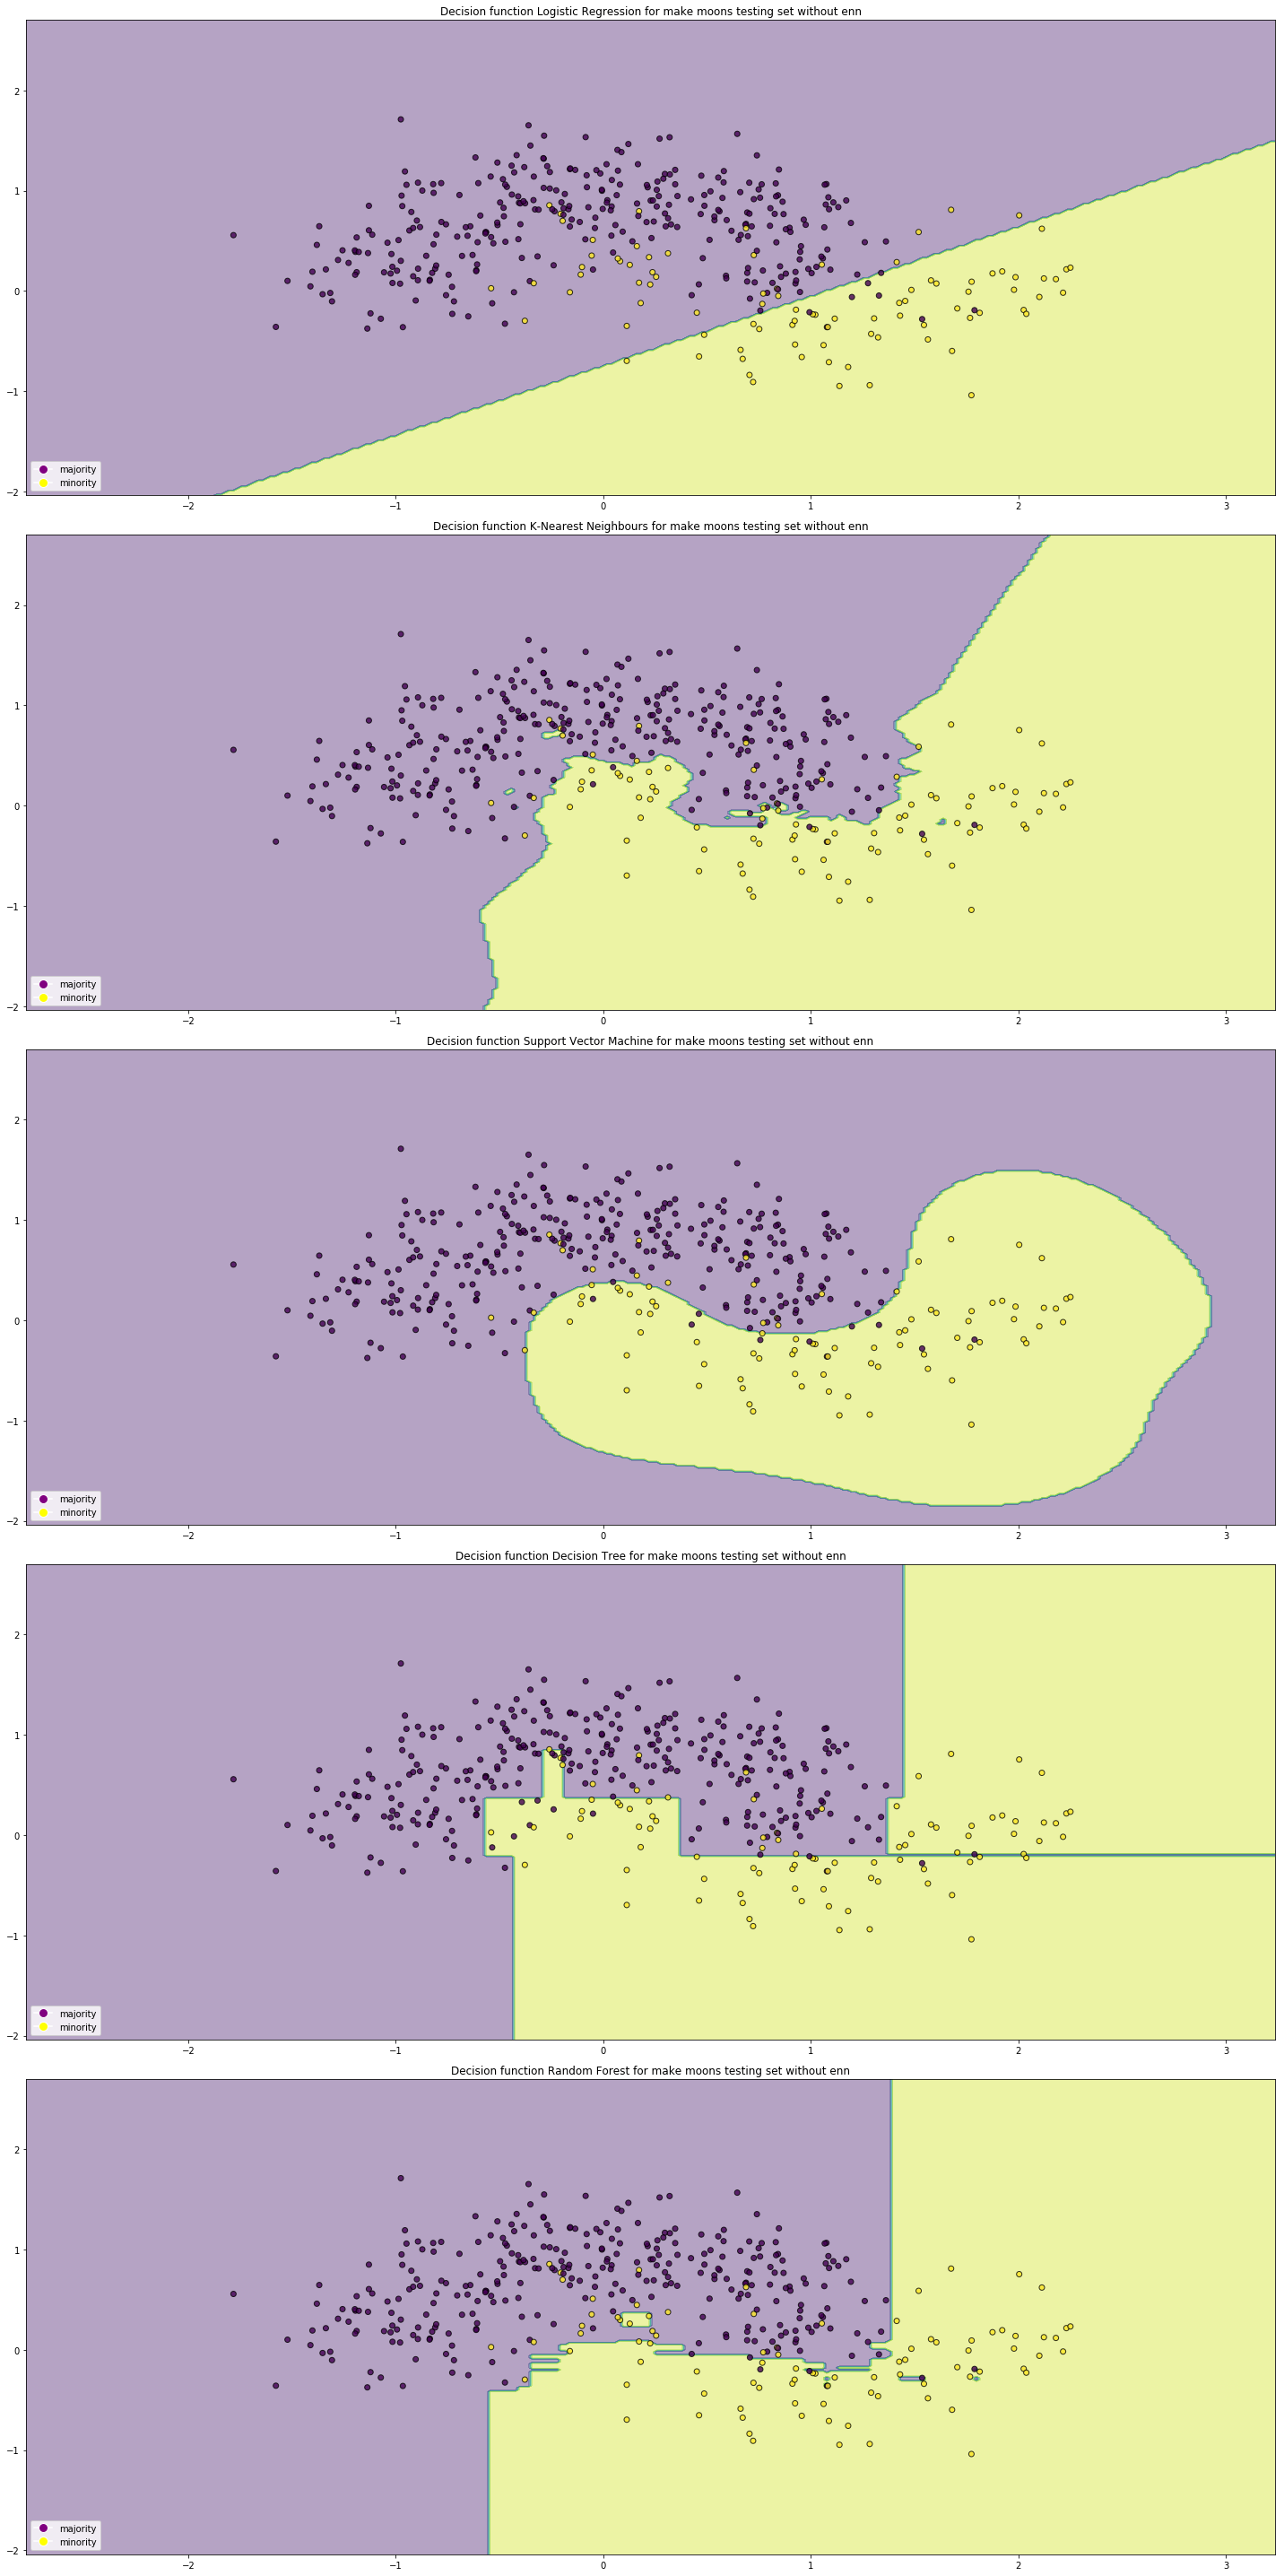

In [15]:
fig, ((ax1),(ax2),(ax3),(ax4),(ax5)) = plt.subplots(5, figsize = (20,40))

# classifiers = [clf_logreg, clf_knn]
ax_arr = ((ax1), (ax2), (ax3), (ax4), (ax5))
names = ["Logistic Regression", "K-Nearest Neighbours", "Support Vector Machine", "Decision Tree", "Random Forest"]

for ax, name, classifier in zip (ax_arr, names,  (clf_logreg3, clf_knn3, clf_svm3, clf_dt3, clf_rf3)):
    classifier.fit(X_test3,y_test3)
    
    plot_decision_function(X_test3, y_test3, classifier, ax)
    ax.set_title('Decision function {} for make moons testing set without enn'.format(name))
    majority=Line2D([], [], color="w", markerfacecolor='purple', marker='o', label='majority', markersize=10)
    minority=Line2D([], [], color="w", markerfacecolor='yellow', marker='o', label='minority', markersize=10)
    ax.legend(handles=[majority,minority], loc='lower left', frameon=True)
fig.tight_layout()
plt.savefig("decision function make moons testng set without enn.pdf")
